* Auto Encoder on image data by tensorflow. 

In [6]:
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import tensorflow as tf
from tqdm import tqdm
import cv2

In [4]:
org_x, train_x = [], []
for path in tqdm(glob.glob('./data/flower_images/*.png')):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    org_x.append(img)
    img = cv2.resize(img, (100, 100))
    train_x.append(img)
train_x = np.array(train_x, dtype='float32')

100%|██████████| 210/210 [00:00<00:00, 685.17it/s]


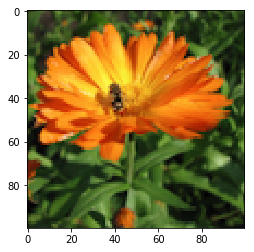

In [5]:
plt.imshow(train_x[0].astype('uint8'), cmap='gray', vmin=0, vmax=255, interpolation='none')
plt.show()

In [7]:
s = train_x.shape
flatten_size = s[1]*s[2]*s[3]
train_x2 = train_x.reshape(len(train_x), flatten_size)
N = len(train_x2)

x_ = tf.placeholder(tf.float32, shape=(None, flatten_size))

h_size = 50
w_enc = tf.Variable(tf.random_normal([flatten_size, h_size], mean=0.0, stddev=0.05), dtype=tf.float32)
b_enc = tf.Variable(tf.random_normal([h_size], mean=0.0, stddev=0.05), dtype=tf.float32)
enc = tf.nn.softsign(tf.matmul(x_, w_enc) + b_enc)
w_dec = tf.Variable(tf.random_normal([h_size, flatten_size], mean=0.0, stddev=0.05), dtype=tf.float32)
b_dec = tf.Variable(tf.random_normal([flatten_size], mean=0.0, stddev=0.05), dtype=tf.float32)
dec = tf.nn.relu(tf.matmul(enc, w_dec)+b_dec)

loss = tf.nn.l2_loss(dec-x_)
train_step = tf.train.AdamOptimizer().minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

EPOCH_NUM = 500000
BATCH_SIZE = 100

for epoch in tqdm(range(EPOCH_NUM), file=sys.stdout):
    perm = np.random.permutation(N)
    total_loss = 0
    for i in range(0, N, BATCH_SIZE):
        batch_x = train_x2[perm[i:i+BATCH_SIZE]]
        total_loss += loss.eval(session=sess, feed_dict={x_: batch_x})
        train_step.run(session=sess, feed_dict={x_: batch_x})
    if (epoch+1) % 1000 == 0:
        tqdm.write("epoch:\t{}\ttotal loss:\t{}".format(epoch+1, total_loss))

epoch:	1000	total loss:	23257992704.0                 
epoch:	2000	total loss:	22049088896.0                  
epoch:	3000	total loss:	16172732160.0                  
epoch:	4000	total loss:	13734822400.0                  
epoch:	5000	total loss:	12184655680.0                  
epoch:	6000	total loss:	10993104320.0                  
epoch:	7000	total loss:	10252220800.0                  
epoch:	8000	total loss:	9836743104.0                   
epoch:	9000	total loss:	9534801760.0                   
epoch:	10000	total loss:	9410913664.0                  
epoch:	11000	total loss:	9442016224.0                   
epoch:	12000	total loss:	9537857088.0                   
epoch:	13000	total loss:	9438694464.0                   
epoch:	14000	total loss:	9274450656.0                   
epoch:	15000	total loss:	9136829888.0                   
epoch:	16000	total loss:	9255442208.0                   
epoch:	17000	total loss:	8978777088.0                   
epoch:	18000	total loss:	9047662272.0     

epoch:	279000	total loss:	6533252992.0                     
epoch:	280000	total loss:	6451129216.0                     
epoch:	281000	total loss:	6365096480.0                     
epoch:	282000	total loss:	6797311296.0                     
epoch:	283000	total loss:	6740377344.0                     
epoch:	284000	total loss:	6441198016.0                     
epoch:	285000	total loss:	6491177856.0                     
epoch:	286000	total loss:	6480380224.0                     
epoch:	287000	total loss:	6371206976.0                     
epoch:	288000	total loss:	6434551872.0                     
epoch:	289000	total loss:	6452211488.0                     
epoch:	290000	total loss:	6533602304.0                     
epoch:	291000	total loss:	6780558208.0                     
epoch:	292000	total loss:	6366668080.0                     
epoch:	293000	total loss:	6398384256.0                     
epoch:	294000	total loss:	6391278144.0                     
epoch:	295000	total loss:	6445529216.0  

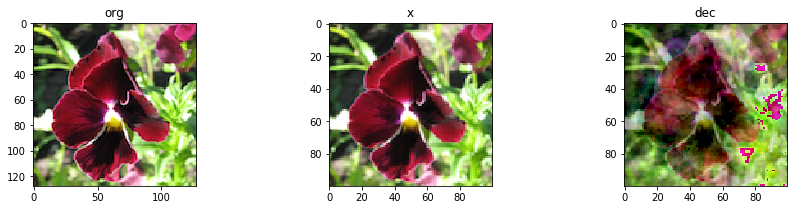

enc
[[-0.99999607  0.99999356  0.99999535  0.99999297  0.99999577 -0.9999977
   0.99999475 -0.99999785 -0.9999978  -0.9999948  -0.9999766   0.9999898
  -0.99999046 -0.9999883  -0.9999938   0.99997777  0.99999636 -0.9999938
   0.99998224  0.99999297 -0.9999965  -0.99999034  0.9999721   0.9999948
   0.9999952  -0.9999951   0.999993    0.9999329   0.99998295 -0.99998957
  -0.99999684 -0.99999297  0.99999523 -0.99999684 -0.9999878   0.9999937
  -0.9999969   0.9999952   0.9999942  -0.999997   -0.99999774  0.99999285
   0.9999944  -0.99999434  0.99999106  0.9999973  -0.9999905  -0.99997514
   0.9999813  -0.99999624]]


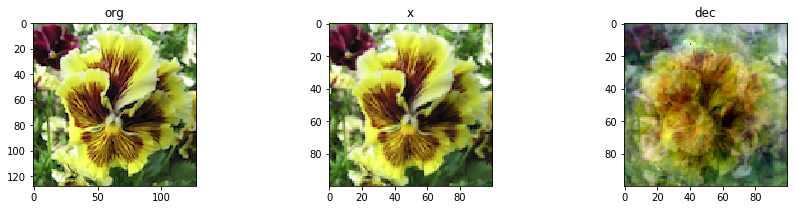

enc
[[-0.99999464 -0.99999607  0.9999975   0.9999958   0.99999493 -0.9999896
   0.99999785 -0.99999726 -0.9999966  -0.9999959  -0.99999607  0.99999744
   0.99999607 -0.9999897  -0.9999919   0.99999464  0.99999577 -0.99998957
   0.99999315  0.9999971  -0.99999535  0.9999898   0.9999941   0.99999326
   0.9999973  -0.9999974   0.9999954   0.9999818  -0.9999922   0.9999892
  -0.99999726  0.9999965  -0.9999601  -0.99999005 -0.9999066  -0.9999924
  -0.9999964   0.9999947  -0.9999897  -0.99999726 -0.999998    0.99999493
   0.9999957  -0.99999607  0.9999931   0.99996626 -0.9999961   0.99999297
   0.99999624 -0.9999973 ]]


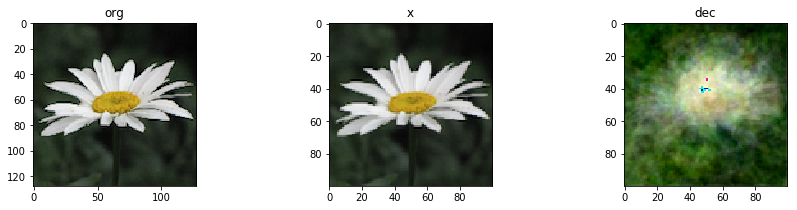

enc
[[-0.9999953  -0.99999475  0.99999034  0.99999     0.99999076  0.99999356
   0.99999493 -0.9999912  -0.99998146 -0.9999947  -0.9999964   0.9999952
   0.9999918  -0.9999979   0.99998987  0.99999464  0.9999945  -0.99999464
   0.99999297  0.9999905  -0.99998224 -0.9999959   0.99999547  0.9999951
   0.99998784 -0.999996    0.9997942  -0.9999904  -0.9999887  -0.9999842
  -0.999993    0.99999565  0.9999974  -0.999996    0.99999696  0.9999948
  -0.9999966   0.9999929  -0.9999979  -0.99999225  0.99998295  0.99999595
   0.9999868  -0.9999896   0.9999895   0.99999744 -0.99999225  0.99998987
   0.99999     0.999996  ]]


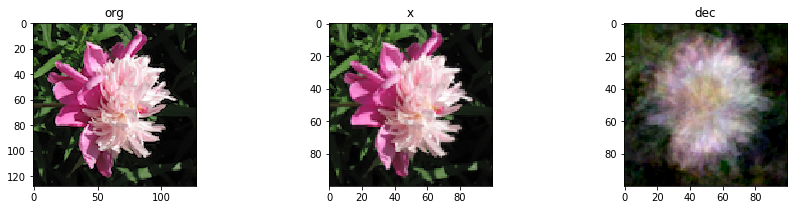

enc
[[-0.99999255 -0.9999971   0.99999577  0.99999475  0.99999344 -0.9999914
   0.999996    0.9999907  -0.99990755 -0.99999213 -0.99999154  0.9999907
   0.99999493 -0.9999945  -0.9999917   0.9999967   0.99999446 -0.9999941
   0.99998635  0.9999945  -0.9999954  -0.99999744 -0.99999106  0.99999434
   0.99999595 -0.9999933   0.99999523 -0.99999624 -0.9999887   0.9999953
  -0.99999666  0.99999636  0.99999624 -0.9999912   0.99999756  0.9999965
  -0.9999961   0.9999961  -0.99999714  0.9999903   0.9999768   0.9999926
   0.99999285 -0.99999344  0.9999902   0.9999962  -0.9999873   0.99999744
   0.99999446  0.999997  ]]


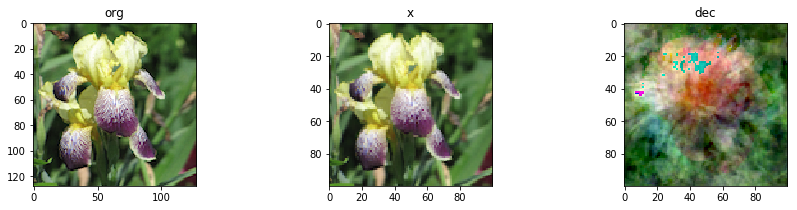

enc
[[-0.99999297 -0.99999446  0.9999975   0.99999684  0.9999957   0.9999819
   0.9999938  -0.99999577 -0.9999952  -0.99999475 -0.9999955   0.9999945
   0.99999434 -0.9999961  -0.9999931   0.99999505  0.9999962  -0.9999931
  -0.99985653  0.99999225 -0.9999966  -0.9999912   0.9999904   0.9999964
   0.9999958  -0.99999565  0.9999926  -0.9999947  -0.9999844   0.9999945
  -0.9999948   0.9999954   0.9999955  -0.9999954   0.9999957   0.999994
  -0.99999464  0.9999961  -0.9999956  -0.9999882  -0.9999955   0.99999523
   0.9999954  -0.9999926   0.999994   -0.9999477  -0.99999225  0.9999966
   0.99999434 -0.9999873 ]]


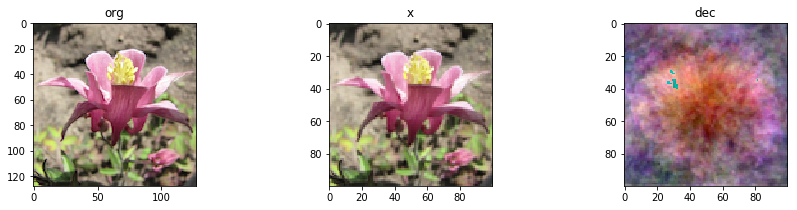

enc
[[-0.9999401  -0.99999654  0.99999624  0.99999636  0.99999636 -0.9999935
   0.99999696 -0.99999785 -0.9999972  -0.99999535 -0.99999577  0.9999961
   0.99999636 -0.99999547 -0.9999944   0.999994    0.9999962  -0.99998933
   0.99999213  0.99999636 -0.99999666  0.9999829   0.9999933   0.9999919
   0.9999975   0.999972    0.9999966  -0.9999951  -0.99999404  0.99999326
  -0.9999977   0.9999972   0.9999964  -0.9999954   0.99993336  0.9999963
  -0.9999974   0.99999577 -0.999995   -0.9999955  -0.9999968   0.9999962
   0.99999666 -0.9999963   0.9999953   0.99999154 -0.9999935  -0.9999862
   0.999992   -0.99999124]]


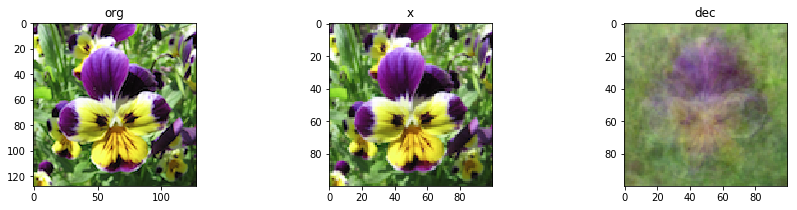

enc
[[-0.9999895  -0.9999941   0.99999726  0.9999957   0.99999446 -0.99999505
   0.9999951  -0.99999654 -0.9999936  -0.9999718  -0.99999547  0.9999965
   0.9999946  -0.9999913  -0.9999946   0.999994    0.99999475 -0.9999914
   0.99999213  0.99999416 -0.99999636 -0.99999243  0.9999865   0.9999925
   0.99999684 -0.9999967   0.9999946  -0.99999595 -0.99999356  0.9999946
  -0.99999684  0.999995    0.99999565 -0.999994   -0.99994457  0.9999929
   0.99998015  0.9999949  -0.99999315 -0.99999106 -0.9999933   0.9999946
   0.9999957  -0.99999386  0.9999911   0.9999961  -0.9999953   0.9999946
   0.99999684 -0.99999535]]


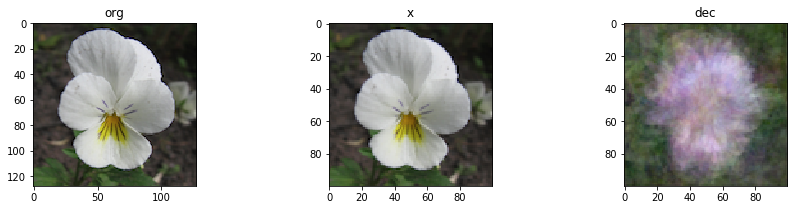

enc
[[-0.99999315 -0.99999255  0.999997    0.99999386  0.99999356 -0.9999931
   0.99999493 -0.9999936  -0.999987   -0.99998885 -0.9999975   0.9999971
   0.9999951  -0.99999344 -0.99998754  0.9999965   0.9999951  -0.99999213
   0.999993    0.9999955  -0.99999636 -0.999997   -0.99999255  0.9999942
   0.9999954  -0.9999939   0.99999434 -0.9999947  -0.9999922   0.99999326
  -0.99999535  0.9999975   0.99999446 -0.9999915   0.99999654  0.99999744
  -0.99999744  0.99999446 -0.9999977   0.9999908  -0.999991    0.99999505
   0.99999535 -0.9999951   0.99999505  0.9999888  -0.9999938   0.99999493
   0.99999714  0.99999523]]


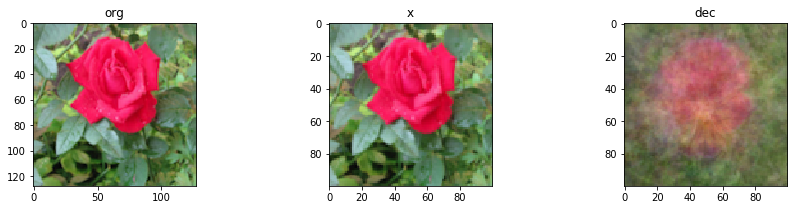

enc
[[-0.9999953  -0.99999654  0.9999928   0.9999973   0.99999696 -0.999994
   0.99999565 -0.9999966  -0.9999961  -0.99998933 -0.9999911   0.9999829
   0.9999957  -0.99999475 -0.99999624  0.9999955   0.99999595 -0.9999925
   0.99998593  0.9999953  -0.9999962  -0.99996215  0.99999464  0.9999965
   0.99999696 -0.99999696  0.9999973  -0.9999966  -0.99999166  0.99999636
  -0.99999696  0.99999344  0.99999684 -0.9999963   0.9999894   0.9999936
  -0.9999929   0.9999939   0.9999777  -0.9999951  -0.9999956   0.99998665
   0.99999166 -0.9999934   0.999994    0.9999975  -0.9999947   0.9999899
   0.9999959  -0.99999547]]


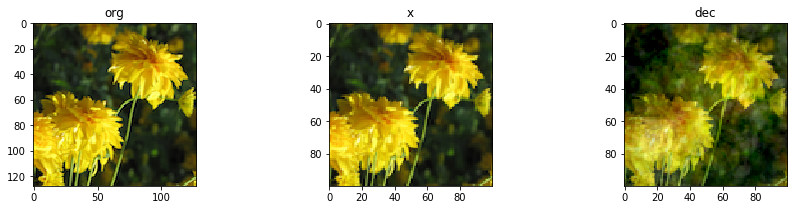

enc
[[-0.99999017 -0.99999356  0.999996   -0.99998105  0.99998975 -0.99998987
   0.999997   -0.9999943  -0.9999945  -0.99999565 -0.9999953   0.9999968
   0.99999154 -0.99998945  0.9999946   0.9999939   0.9999964  -0.9999889
   0.9999951   0.999996   -0.99999    -0.9999849   0.9999909   0.9999907
   0.9999978  -0.99999774  0.99999505 -0.999987   -0.99999154 -0.99999523
  -0.99999607  0.99999475 -0.9999888  -0.99999356  0.99999285 -0.9999949
  -0.9999822  -0.99999213 -0.9999955  -0.99999756 -0.9999889   0.99998945
   0.99999446 -0.99998915  0.99998766  0.9999964  -0.9999958   0.9999876
   0.99999416 -0.99999714]]


In [8]:
sample = np.random.randint(0, N, 10)

for i in sample:
    fig, axs = plt.subplots(ncols=3, figsize=(15,3))
    axs[0].imshow(org_x[i], cmap='gray', vmin=0, vmax=255, interpolation='none')
    axs[0].set_title('org')
    axs[1].imshow(train_x[i].reshape(s[1], s[2], s[3]).astype('uint8'), cmap='gray', vmin=0, vmax=255, interpolation='none')
    axs[1].set_title('x')
    d = dec.eval(session=sess, feed_dict={x_: train_x2[i].reshape(1,flatten_size)})
    axs[2].imshow(d.reshape(s[1], s[2], s[3]).astype('uint8'), cmap='gray', vmin=0, vmax=255, interpolation='none')
    axs[2].set_title('dec')
    plt.show()
    e = enc.eval(session=sess, feed_dict={x_: train_x2[i].reshape(1,flatten_size)})
    print("enc")
    print(e)

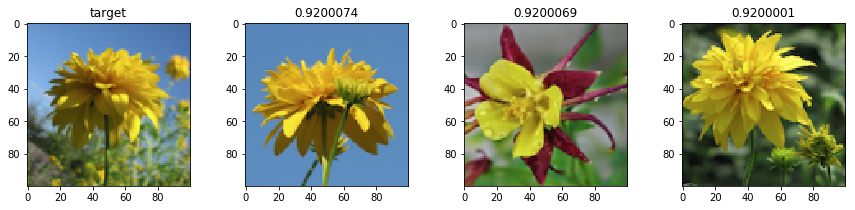

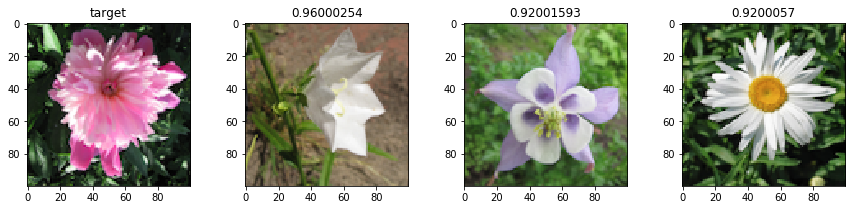

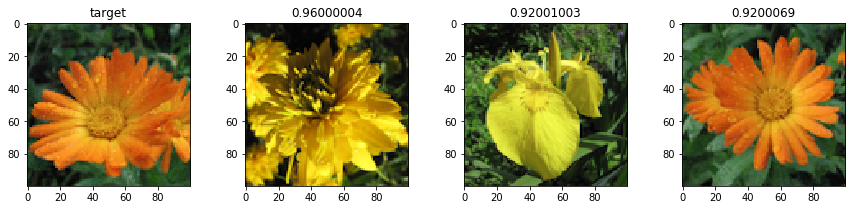

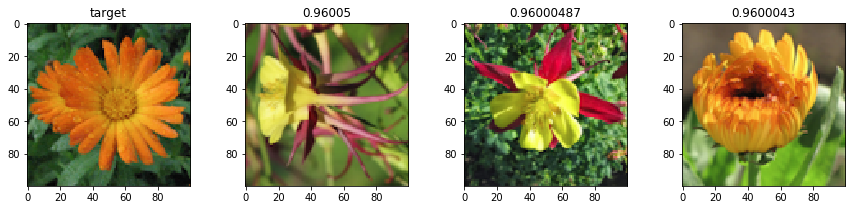

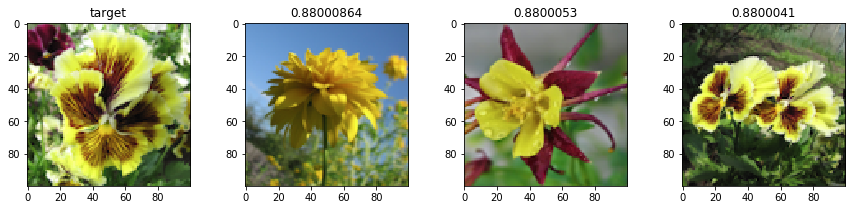

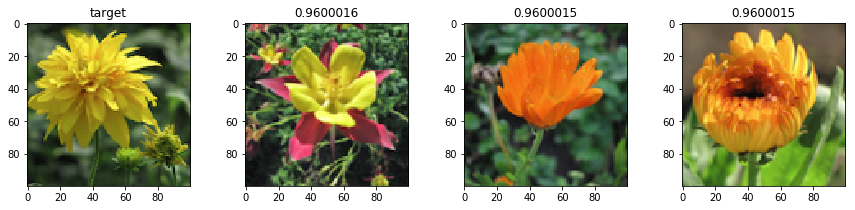

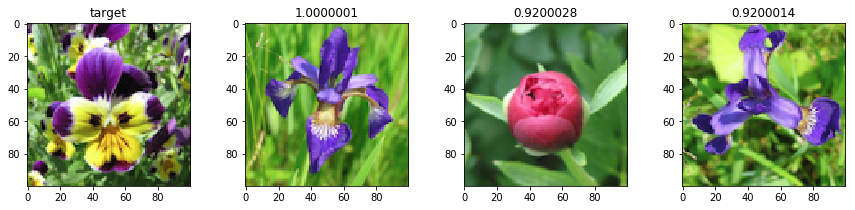

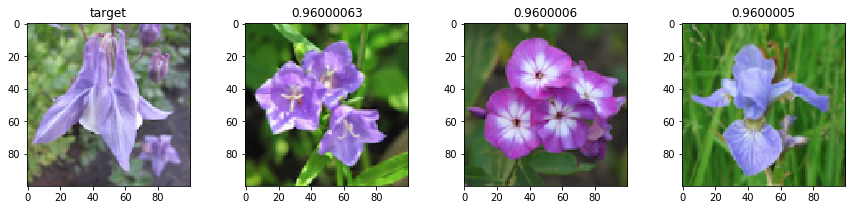

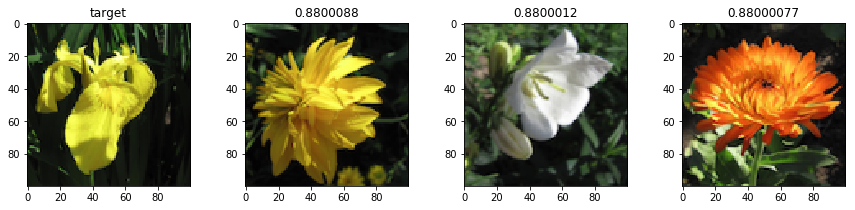

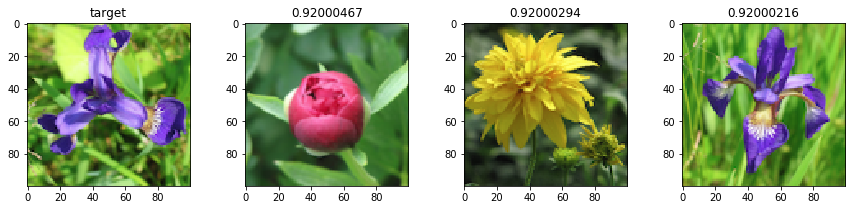

In [10]:
sample = np.random.randint(0, N, 10)

for i in sample:
    e1 = enc.eval(session=sess, feed_dict={x_: train_x2[i].reshape(1,flatten_size)})
    e2 = enc.eval(session=sess, feed_dict={x_: train_x2})
    e1_ = tf.placeholder(tf.float32, shape=[None, None])
    e2_ = tf.placeholder(tf.float32, shape=[None, None])
    normalize_e1 = tf.nn.l2_normalize(e1_,1)        
    normalize_e2 = tf.nn.l2_normalize(e2_,1)
    cos_similarity = tf.reduce_sum(tf.multiply(normalize_e1, normalize_e2), axis=1)
    tmp_sess = tf.Session()
    d = cos_similarity.eval(session=tmp_sess, feed_dict={e1_: e1, e2_: e2})
    idxs = np.argsort(d)[::-1]
    idxs = np.delete(idxs, np.where(idxs==i))
    sim_num = 3
    idxs = idxs[:sim_num]
    fig, axs = plt.subplots(ncols=4, figsize=(15, sim_num))
    axs[0].imshow(train_x2[i].reshape(s[1], s[2], s[3]).astype('uint8'), cmap='gray', vmin=0, vmax=255, interpolation='none')
    axs[0].set_title('target')
    for k in range(sim_num):
        axs[k+1].imshow(train_x2[idxs[k]].reshape(s[1], s[2], s[3]).astype('uint8'), cmap='gray', vmin=0, vmax=255, interpolation='none')
        axs[k+1].set_title(str(d[idxs[k]]))
    plt.show()

In [1]:
!python --version

Python 3.6.3


In [2]:
!pip freeze

absl-py==0.2.0
astor==0.6.2
backcall==0.1.0
bleach==1.5.0
certifi==2018.4.16
chainer==4.0.0
chardet==3.0.4
cntk-gpu==2.5.1
cupy==4.0.0
cycler==0.10.0
Cython==0.28.2
decorator==4.3.0
dm-sonnet==1.20
entrypoints==0.2.3
fastrlock==0.3
filelock==3.0.4
future==0.16.0
gast==0.2.0
graphviz==0.8.3
grpcio==1.11.0
h5py==2.7.1
html5lib==0.9999999
idna==2.6
ipykernel==4.8.2
ipython==6.3.1
ipython-genutils==0.2.0
ipywidgets==7.2.1
jedi==0.12.0
Jinja2==2.10
jsonschema==2.6.0
jupyter==1.0.0
jupyter-client==5.2.3
jupyter-console==5.2.0
jupyter-core==4.4.0
kaggle==1.4.5
Keras==2.1.6
kiwisolver==1.0.1
Lasagne==0.2.dev1
leveldb==0.194
Mako==1.0.7
Markdown==2.6.11
MarkupSafe==1.0
matplotlib==2.2.2
mistune==0.8.3
mxnet-cu90==1.1.0.post0
nbconvert==5.3.1
nbformat==4.4.0
networkx==2.1
nose==1.3.7
notebook==5.4.1
numpy==1.14.3
pandas==0.22.0
pandocfilters==1.4.2
parso==0.2.0
pexpect==4.5.0
pickleshare==0.7.4
Pillow==5.1.0
prompt-toolkit==1.0.15
protobuf==3.5.2.post1
ptyprocess==0.5.2
pycurl==7.43.0
Pygments==

In [3]:
!cat /proc/driver/nvidia/version

NVRM version: NVIDIA UNIX x86_64 Kernel Module  384.111  Tue Dec 19 23:51:45 PST 2017
GCC version:  gcc version 5.4.0 20160609 (Ubuntu 5.4.0-6ubuntu1~16.04.10) 


In [4]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176
